# Supermarket Sales - Exploratory Data Analysis

## 0. Frame the problem

Get meaningful insights from the data in actionable manner

## 0.1. Data description

source: https://www.kaggle.com/aungpyaeap/supermarket-sales

The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Attribute information**

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5\% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## 0.2. Imports

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
sns.set_theme(style="darkgrid")
sns.set_context("paper", font_scale=1.3, rc={"lines.linewidth": 2})
sns.set_palette('colorblind')

## 1. Get the Data

In [20]:
data_raw = pd.read_csv('../inputs/data_raw/ssales.csv', parse_dates=[[10, 11]],
                       infer_datetime_format=True, index_col=0)

In [21]:
sales = data_raw.copy()

In [22]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
Date_Time,,,,,,,,,,,,,,,
2019-01-05 13:08:00,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08 10:29:00,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2019-03-03 13:23:00,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27 20:33:00,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08 10:37:00,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


In [23]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2019-01-05 13:08:00 to 2019-02-18 13:28:00
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Payment                  1000 non-null   object 
 11  cogs                     1000 non-null   float64
 12  gross margin percentage  1000 non-null   float64
 13  gross income             1000 non-null   f

## 2. Data Cleaning

In [24]:
sales.drop(['Invoice ID', 'City', 'Tax 5%', 'cogs', 
            'gross margin percentage', 'gross income'], axis=1, 
          inplace=True)

In [25]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2019-01-05 13:08:00 to 2019-02-18 13:28:00
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   Customer type  1000 non-null   object 
 2   Gender         1000 non-null   object 
 3   Product line   1000 non-null   object 
 4   Unit price     1000 non-null   float64
 5   Quantity       1000 non-null   int64  
 6   Total          1000 non-null   float64
 7   Payment        1000 non-null   object 
 8   Rating         1000 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 78.1+ KB


## 3. EDA

In [26]:
sales.describe()

,Unit price,Quantity,Total,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,322.966749,6.97270
std,26.494628,2.923431,245.885335,1.71858
min,10.080000,1.000000,10.678500,4.00000
25%,32.875000,3.000000,124.422375,5.50000
50%,55.230000,5.000000,253.848000,7.00000
75%,77.935000,8.000000,471.350250,8.50000
max,99.960000,10.000000,1042.650000,10.00000


In [27]:
mask = [sales[col].dtype == 'object' for col in sales.columns]
cat_sales = sales.loc[:, mask]
cat_sales.nunique()

Branch           3
Customer type    2
Gender           2
Product line     6
Payment          3
dtype: int64

The number of variables in each categorical attribute is small, depends on the quantity of each one. they could be good candidates for One Hot Encoding

### 3.1. Categorical Variables

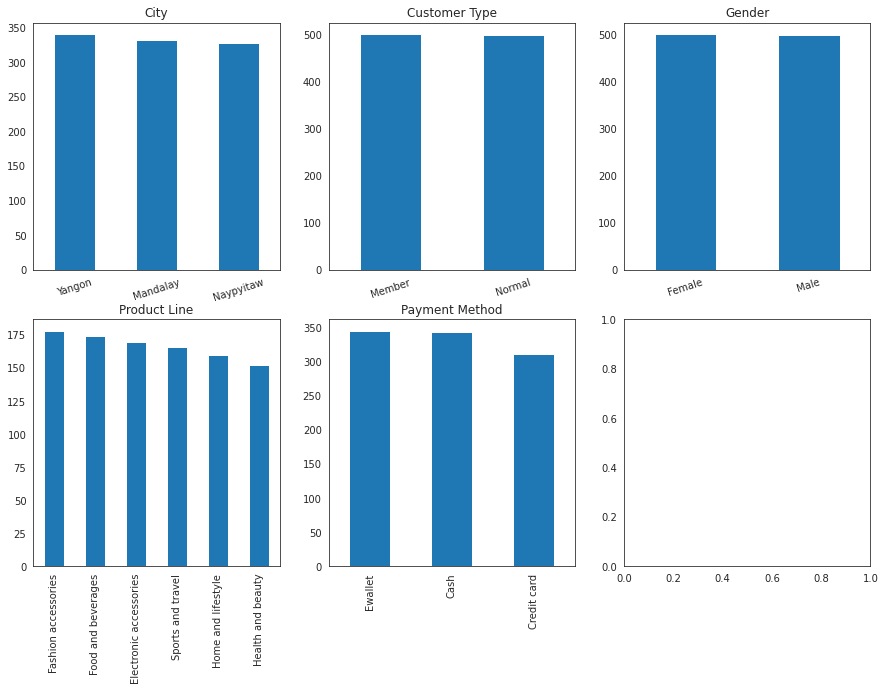

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
sales['City'].value_counts().plot(kind='bar', ax=axs[0, 0], title = 'City', rot=18)
sales['Customer type'].value_counts().plot(kind='bar', ax=axs[0, 1], title= 'Customer Type',  rot=18)
sales['Gender'].value_counts().plot(kind='bar', ax=axs[0, 2], title='Gender', rot=18)
sales['Product line'].value_counts().plot(kind='bar', ax=axs[1, 0], title='Product Line')
sales['Payment'].value_counts().plot(kind='bar', ax=axs[1, 1], title='Payment Method')

The distribution is ok!

No handles with labels found to put in legend.


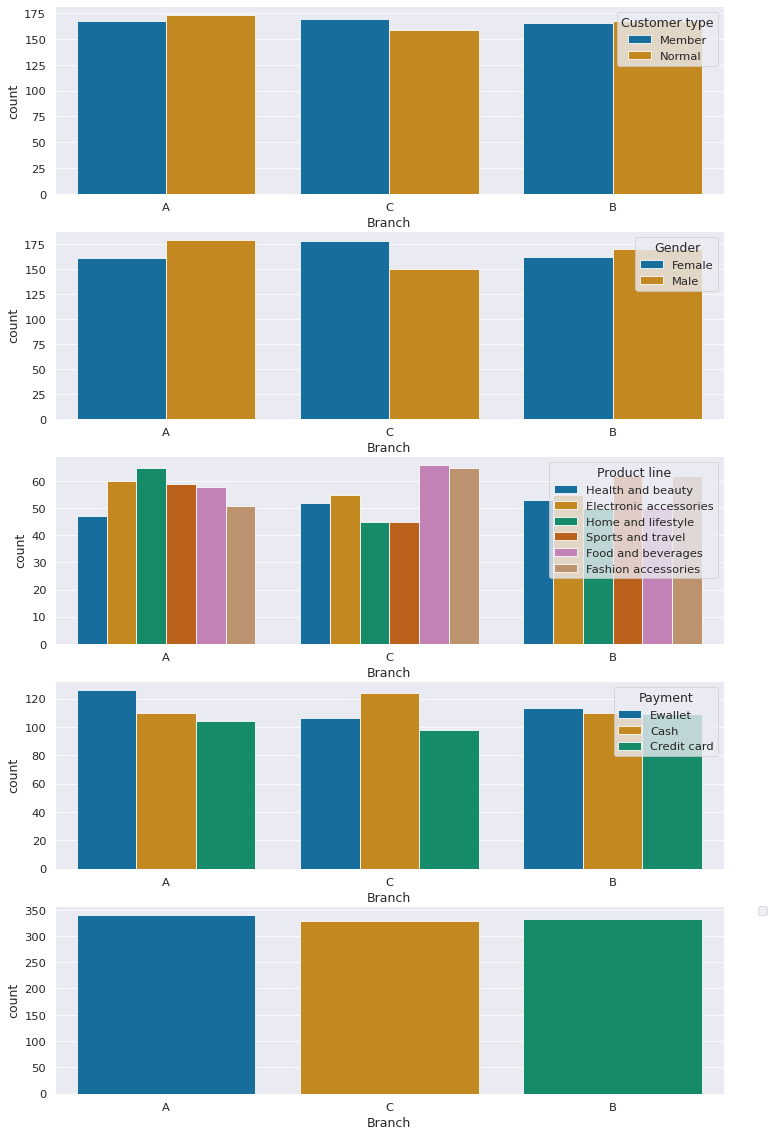

In [143]:
fig, ax = plt.subplots(5, 1, figsize=(12, 20))

sns.countplot(x='Branch', hue='Customer type', data=cat_sales, ax=ax[0])
sns.countplot(x='Branch', hue='Gender', data=cat_sales, ax=ax[1])
sns.countplot(x='Branch', hue='Product line', data=cat_sales, ax=ax[2])
sns.countplot(x='Branch', hue='Payment', data=cat_sales, ax=ax[3])
sns.countplot(x='Branch', data=cat_sales, ax=ax[4])

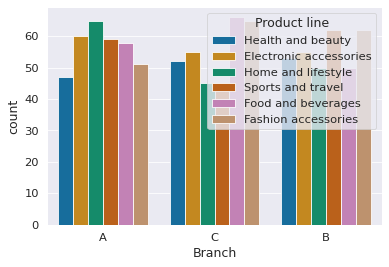

In [163]:
sns.countplot(x='Branch', hue='Product line', data=cat_sales)

plt.savefig('../outputs/figures/branch_line.png')

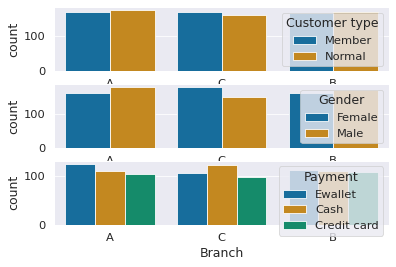

In [138]:
fig, ax = plt.subplots(3, 1)

sns.countplot(x='Branch', hue='Customer type', data=cat_sales, ax=ax[0])
sns.countplot(x='Branch', hue='Gender', data=cat_sales, ax=ax[1])
sns.countplot(x='Branch', hue='Payment', data=cat_sales, ax=ax[2])

plt.savefig('../outputs/figures/branch_gender_payment.png')

* Branch C has more Female within clients and Member as well. Members are more Female? Yes
* Branch C sells more Food and Fashion Women buys more Food and Fashion? Less Sport and H & L. Women buy more Food and Fashion but the second is Sport, and Branch C don't sell a lot of sport, it can be a problem here
* Branch C payment is more cash. Women use more cash? Yes
* Branch A the most important Product Line is H & L > Eletro > Sport.
* Branch A Ewallet men use more EW? Yes
* Branch B sells more Sport > Fashion

Branch B is more neutral, meaning that the categories are well distributed.

In [139]:
sales.groupby(['Product line', 'Gender'])[['Total', 'Rating']].agg(['count', 'mean', 'std'])

Total                         Rating            \
                              count        mean         std  count      mean   
Product line           Gender                                                  
Electronic accessories Female    84  322.643125  247.064246     84  6.786905   
                       Male      86  316.691965  246.261384     86  7.059302   
Fashion accessories    Female    96  317.056250  231.938795     96  7.120833   
                       Male      82  291.079207  257.236773     82  6.921951   
Food and beverages     Female    90  368.565750  271.227129     90  7.203333   
                       Male      84  273.499125  209.076132     84  7.016667   
Health and beauty      Female    64  290.015414  215.252319     64  7.146875   
                       Male      88  348.099460  250.885950     88  6.898864   
Home and lifestyle     Female    79  380.213639  270.278721     79  6.763291   
                       Male      81  294.136241  232.173065     81  6.909877   
Sports and travel      Female    88  324.712739  246.696381     88  6.767045   
                       Male      78  340.360327  251.593202     78  7.084615   

                                         
                                    std  
Product line           Gender            
Electronic accessories Female  1.734260  
                       Male    1.669052  
Fashion accessories    Female  1.783664  
                       Male    1.631709  
Food and beverages     Female  1.748029  
                       Male    1.684360  
Health and beauty      Female  1.793371  
                       Male    1.744844  
Home and lifestyle     Female  1.676243  
                       Male    1.766395  
Sports and travel      Female  1.783882  
                       Male    1.627609

In [140]:
sales.groupby(['Product line', 'Branch'])[['Total', 'Rating']].agg(['count', 'mean', 'std'])

Total                         Rating            \
                              count        mean         std  count      mean   
Product line           Branch                                                  
Electronic accessories A         60  305.285225  246.411455     60  6.911667   
                       B         55  310.026245  250.401657     55  7.116364   
                       C         55  344.890445  243.505198     55  6.747273   
Fashion accessories    A         51  320.245265  257.255822     51  6.878431   
                       B         62  264.730911  203.755302     62  6.722581   
                       C         65  331.693385  265.166027     65  7.440000   
Food and beverages     A         58  295.915526  205.761806     58  7.253448   
                       B         50  304.297770  220.888774     50  6.994000   
                       C         66  360.103864  293.862985     66  7.080303   
Health and beauty      A         47  268.037298  186.079373     47  6.900000   
                       B         53  376.993585  259.566580     53  7.100000   
                       C         52  319.525500  247.608362     52  6.998077   
Home and lifestyle     A         65  344.879931  246.511642     65  6.930769   
                       B         50  350.983290  267.137830     50  6.516000   
                       C         45  308.790067  255.445086     45  7.060000   
Sports and travel      A         59  328.350839  235.076176     59  7.257627   
                       B         62  322.390306  246.927203     62  6.509677   
                       C         45  350.265067  271.062493     45  7.028889   

                                         
                                    std  
Product line           Branch            
Electronic accessories A       1.710099  
                       B       1.540534  
                       C       1.851511  
Fashion accessories    A       1.601913  
                       B       1.703941  
                       C       1.751232  
Food and beverages     A       1.747099  
                       B       1.688183  
                       C       1.724861  
Health and beauty      A       1.802896  
                       B       1.861761  
                       C       1.650964  
Home and lifestyle     A       1.837621  
                       B       1.706573  
                       C       1.528874  
Sports and travel      A       1.693314  
                       B       1.729940  
                       C       1.640762

In [36]:
pd.crosstab(sales['Gender'], sales['Branch'], normalize='index')

Branch,A,B,C
Gender,,,
Female,0.321357,0.323353,0.355289
Male,0.358717,0.340681,0.300601


In [35]:
pd.crosstab(sales['Gender'], sales['Customer type'], normalize='index')

Customer type,Member,Normal
Gender,,
Female,0.520958,0.479042
Male,0.480962,0.519038


In [37]:
pd.crosstab(sales['Gender'], sales['Product line'], normalize='index')

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,0.167665,0.191617,0.179641,0.127745,0.157685,0.175649
Male,0.172345,0.164329,0.168337,0.176353,0.162325,0.156313


In [38]:
pd.crosstab(sales['Gender'], sales['Payment'], normalize='index')

Payment,Cash,Credit card,Ewallet
Gender,,,
Female,0.355289,0.325349,0.319361
Male,0.332665,0.296593,0.370741


In [59]:
pd.crosstab(sales['Gender'], sales['Product line'], sales['Branch'], aggfunc='count')

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,84,96,90,64,79,88
Male,86,82,84,88,81,78


In [72]:
sales.groupby(['Product line', 'Branch', 'Gender'])[['Total', 'Rating']].agg(['count', 'mean', 'std'])

Total                         Rating  \
                                     count        mean         std  count   
Product line           Branch Gender                                        
Electronic accessories A      Female    28  355.939125  254.168397     28   
                              Male      32  260.963062  234.414150     32   
                       B      Female    28  291.661125  250.723426     28   
                              Male      27  329.071556  253.387493     27   
                       C      Female    28  320.329125  240.892672     28   
                              Male      27  370.361444  248.125245     27   
Fashion accessories    A      Female    28  351.293625  216.620187     28   
                              Male      23  282.447261  300.168119     23   
                       B      Female    33  275.196727  199.715760     33   
                              Male      29  252.821534  211.153087     29   
                       C      Female    35  329.133900  269.613647     35   
                              Male      30  334.679450  264.446396     30   
Food and beverages     A      Female    23  304.337478  237.731069     23   
                              Male      35  290.381100  185.282353     35   
                       B      Female    29  362.413655  248.913159     29   
                              Male      21  224.042500  145.392241     21   
                       C      Female    38  412.135776  303.177905     38   
                              Male      28  289.489125  270.094828     28   
Health and beauty      A      Female    21  272.138000  191.523159     21   
                              Male      26  264.725192  185.312036     26   
                       B      Female    20  320.017425  242.728834     20   
                              Male      33  411.524591  266.914493     33   
                       C      Female    23  280.249565  217.324209     23   
                              Male      29  350.675379  268.868674     29   
Home and lifestyle     A      Female    32  394.900406  260.328931     32   
                              Male      33  296.375227  225.730813     33   
                       B      Female    22  434.415068  320.350568     22   
                              Male      28  285.429750  198.903639     28   
                       C      Female    25  313.717320  229.114957     25   
                              Male      20  302.631000  291.085346     20   
Sports and travel      A      Female    29  279.833690  213.611944     29   
                              Male      30  375.250750  248.667731     30   
                       B      Female    30  307.093850  239.729521     30   
                              Male      32  336.730734  256.472247     32   
                       C      Female    29  387.818224  278.212020     29   
                              Male      16  282.199969  251.742971     16   

                                                          
                                          mean       std  
Product line           Branch Gender                      
Electronic accessories A      Female  6.307143  1.541026  
                              Male    7.440625  1.696649  
                       B      Female  7.103571  1.728301  
                              Male    7.129630  1.351584  
                       C      Female  6.950000  1.874488  
                              Male    6.537037  1.838718  
Fashion accessories    A      Female  7.025000  1.636759  
                              Male    6.700000  1.575956  
                       B      Female  6.681818  1.890512  
                              Male    6.768966  1.495494  
                       C      Female  7.611429  1.719229  
                              Male    7.240000  1.796088  
Food and beverages     A      Female  7.000000  1.813585  
                              Male    7.420000  1.707905  
                       B      

Ticket per Branch
H&L: F B > A > C - F
H&B: F B > C > A .. M B > C > A - M
F&B: Rating F B = C > A .. M A > C > B - F
Fash: F A > C > B .. M C > A > B Rating M C > B > A - F
ELE: M C > B > A .. F A > C > B

**Men do not buy sport travel in C**

In [49]:
s_and_t = sales.loc[sales['Product line'] == 'Sports and travel']
pd.crosstab(s_and_t['Gender'], s_and_t['Branch'], normalize='index')

Branch,A,B,C
Gender,,,
Female,0.329545,0.340909,0.329545
Male,0.384615,0.410256,0.205128


**Men do not buy H&B in A and ticket B > C > A**

In [55]:
h_and_b = sales.loc[sales['Product line'] == 'Health and beauty']
pd.crosstab(h_and_b['Gender'], h_and_b['Branch'], normalize='index')

Branch,A,B,C
Gender,,,
Female,0.328125,0.3125,0.359375
Male,0.295455,0.3750,0.329545


**Women buy H&L in A  and B > A > C**

In [56]:
h_and_l = sales.loc[sales['Product line'] == 'Home and lifestyle']
pd.crosstab(h_and_l['Gender'], h_and_l['Branch'], normalize='index')

Branch,A,B,C
Gender,,,
Female,0.405063,0.278481,0.316456
Male,0.407407,0.345679,0.246914


**Men do not buy fashion in A more in C  M C > A > B Rating M C > B > A**

In [58]:
fash = sales.loc[sales['Product line'] == 'Fashion accessories']
pd.crosstab(fash['Gender'], fash['Branch'], normalize='index')

Branch,A,B,C
Gender,,,
Female,0.291667,0.343750,0.364583
Male,0.280488,0.353659,0.365854


### 3.2. Numerical Variables

In [128]:
sales.groupby(['Branch'])[['Total', 'Rating', 'Unit price', 'Quantity']].describe().T

Branch                      A            B            C
Total      count   340.000000   332.000000   328.000000
           mean    312.354031   319.872506   337.099715
           std     231.640025   242.447565   263.160870
           min      12.694500    18.637500    10.678500
           25%     137.489625   119.936250   121.474500
           50%     240.828000   252.882000   271.419750
           75%     459.340875   465.585750   495.754875
           max    1039.290000  1022.490000  1042.650000
Rating     count   340.000000   332.000000   328.000000
           mean      7.027059     6.818072     7.072866
           std       1.731345     1.713719     1.704526
           min       4.000000     4.000000     4.000000
           25%       5.600000     5.300000     5.600000
           50%       7.100000     6.700000     7.100000
           75%       8.500000     8.200000     8.500000
           max      10.000000    10.000000    10.000000
Unit price count   340.000000   332.000000   328.000000
           mean     54.780853    55.659277    56.609024
           std      26.132127    26.224559    27.179799
           min      10.080000    10.590000    10.160000
           25%      32.250000    33.300000    33.767500
           50%      53.235000    54.850000    56.810000
           75%      75.095000    77.002500    81.552500
           max      99.830000    99.960000    99.960000
Quantity   count   340.000000   332.000000   328.000000
           mean      5.467647     5.481928     5.582317
           std       2.859876     2.896446     3.021724
           min       1.000000     1.000000     1.000000
           25%       3.000000     3.000000     3.000000
           50%       5.000000     5.000000     6.000000
           75%       8.000000     8.000000     8.000000
           max      10.000000    10.000000    10.000000

<AxesSubplot:xlabel='Unit price', ylabel='Total'>

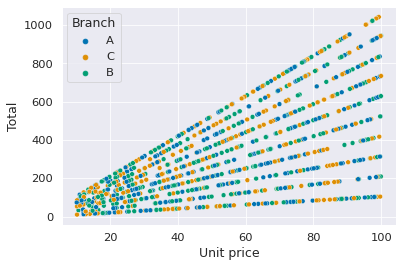

In [132]:
sns.scatterplot(data=sales, x='Unit price', y='Total', hue='Branch')

In [98]:
sales.groupby(['Branch', 'Gender'])[['Total', 'Rating']].describe().T

Branch                 A                         B                        C  \
Gender            Female         Male       Female        Male       Female   
Total  count  161.000000   179.000000   162.000000  170.000000   178.000000   
       mean   330.864391   295.705047   326.717870  313.349276   346.547545   
       std    233.068675   229.724007   250.170410  235.407292   263.356730   
       min     12.694500    19.194000    18.637500   33.936000    13.167000   
       25%    161.553000    99.828750   111.628125  125.708625   121.810500   
       50%    257.145000   233.100000   261.324000  249.653250   292.320000   
       75%    469.770000   453.180000   470.909250  452.190375   511.882875   
       max    951.825000  1039.290000  1022.490000  944.622000  1042.650000   
Rating count  161.000000   179.000000   162.000000  170.000000   178.000000   
       mean     6.839130     7.196089     6.876543    6.762353     7.157865   
       std      1.735986     1.714425     1.825987    1.602880     1.700638   
       min      4.100000     4.000000     4.000000    4.000000     4.000000   
       25%      5.200000     5.800000     5.100000    5.500000     5.625000   
       50%      6.800000     7.300000     6.750000    6.700000     7.300000   
       75%      8.200000     8.700000     8.500000    8.000000     8.575000   
       max     10.000000     9.900000    10.000000   10.000000    10.000000   

Branch                     
Gender               Male  
Total  count   150.000000  
       mean    325.888290  
       std     263.368100  
       min      10.678500  
       25%     121.477125  
       50%     255.396750  
       75%     462.952875  
       max    1023.750000  
Rating count   150.000000  
       mean      6.972000  
       std       1.709316  
       min       4.000000  
       25%       5.625000  
       50%       6.850000  
       75%       8.500000  
       max       9.900000

Total M C > B > A

In [125]:
sales.groupby(['Gender'])[['Total', 'Rating']].describe()

Total                                                              \
        count        mean         std      min       25%     50%      75%   
Gender                                                                      
Female  501.0  335.095659  249.324401  12.6945  132.7620  272.58  486.444   
Male    499.0  310.789226  242.021730  10.6785  117.9465  244.23  456.834   

                Rating                                                 
            max  count      mean       std  min  25%  50%   75%   max  
Gender                                                                 
Female  1042.65  501.0  6.964471  1.755761  4.0  5.4  7.1  8.50  10.0  
Male    1039.29  499.0  6.980962  1.682146  4.0  5.6  6.9  8.45  10.0

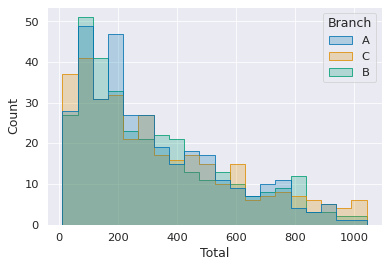

In [118]:
sns.histplot(data=sales, x='Total', hue='Branch', bins=20, element="step")
plt.savefig('../outputs/figures/hist.png')

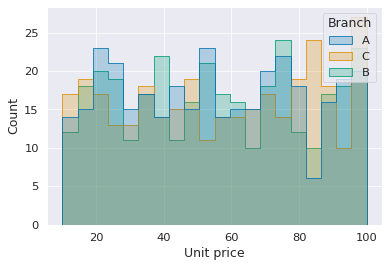

In [117]:
sns.histplot(data=sales, x='Unit price', hue='Branch', bins=20, element="step")

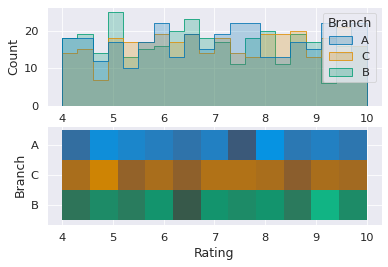

In [133]:
fig, ax = plt.subplots(2, 1)
sns.histplot(data=sales, x='Rating', hue='Branch', bins=20, element="step", ax=ax[0])
sns.histplot(sales, x='Rating', y='Branch', hue='Branch', legend=False, ax=ax[1])
plt.savefig('../outputs/figures/rating.png')

### 3.3. Log Transformation

In [164]:
sales['Total_log'] = np.log(sales['Total'])

### 3.4. Correlations

In [165]:
sales.corr()

,Unit price,Quantity,Total,Rating,Total_log
Unit price,1.000000,0.010778,0.633962,-0.008778,0.619139
Quantity,0.010778,1.000000,0.705510,-0.015815,0.733971
Total,0.633962,0.705510,1.000000,-0.036442,0.900138
Rating,-0.008778,-0.015815,-0.036442,1.000000,-0.010719
Total_log,0.619139,0.733971,0.900138,-0.010719,1.000000


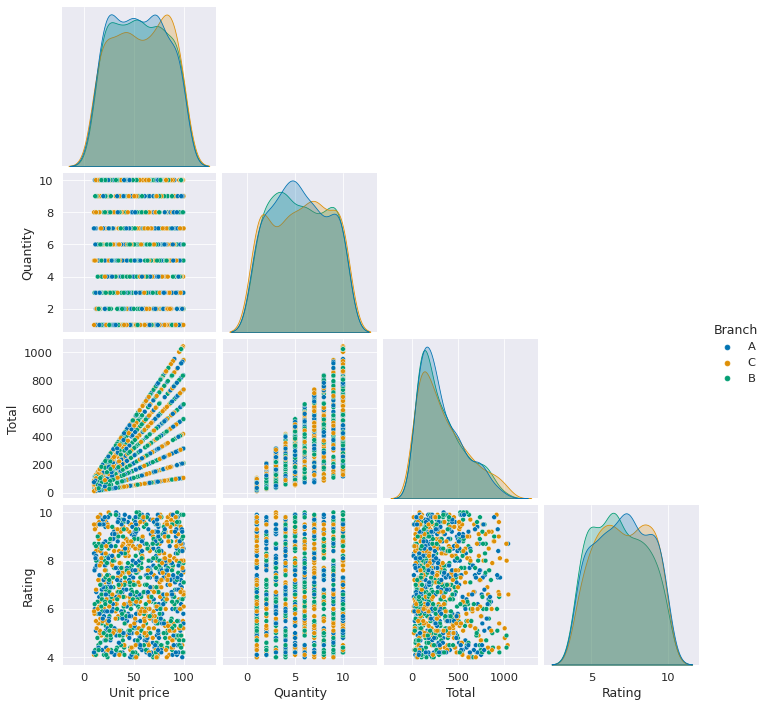

In [136]:
sns.pairplot(sales, hue='Branch', corner=True)

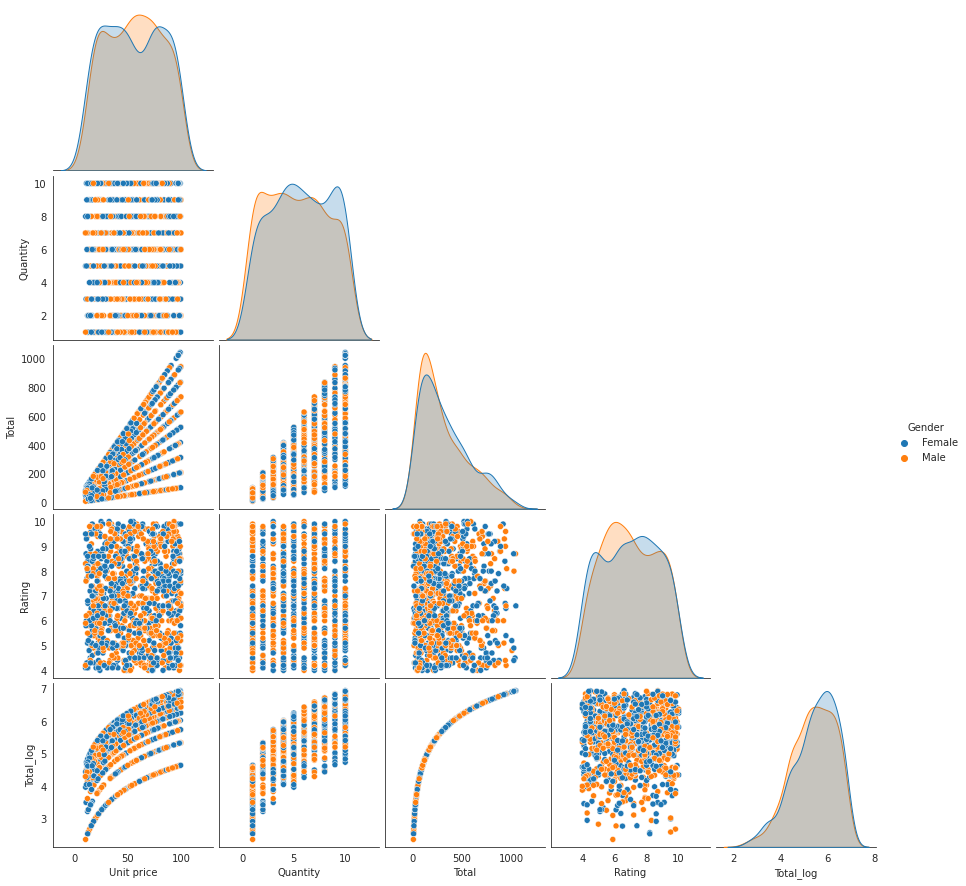

In [15]:
sns.pairplot(sales, hue='Gender', corner=True)
plt.savefig('../outputs/figures/pairgender.png')

There isn't strong correlation between numerical variables besides the direct related ones: Unit Price vs. Total and Total vs. Quantity

### 3.5. Categorical Variables vs. Total

In [166]:
pd.crosstab(sales['Gender'], sales['Product line'], sales['Total'], aggfunc=np.mean, margins=True)

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,All
Gender,,,,,,,
Female,322.643125,317.056250,368.565750,290.015414,380.213639,324.712739,335.095659
Male,316.691965,291.079207,273.499125,348.099460,294.136241,340.360327,310.789226
All,319.632538,305.089298,322.671517,323.643020,336.636956,332.065220,322.966749


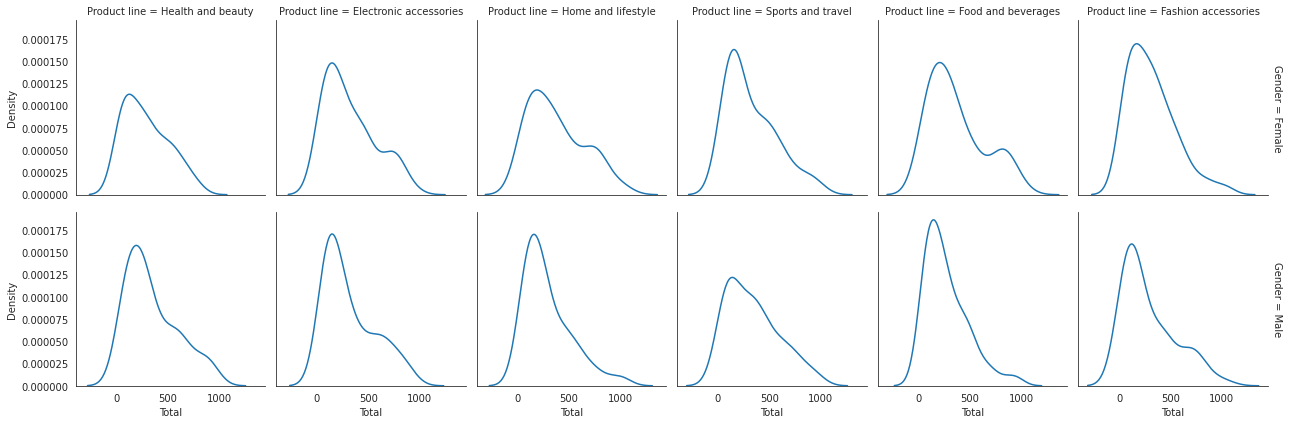

In [20]:
sns.displot(
    sales, x='Total', col='Product line', row='Gender', height=3, 
    facet_kws=dict(margin_titles=True), kind="kde")

In [21]:
pd.crosstab(sales['Gender'], sales['Product line'], normalize='index')

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,0.167665,0.191617,0.179641,0.127745,0.157685,0.175649
Male,0.172345,0.164329,0.168337,0.176353,0.162325,0.156313


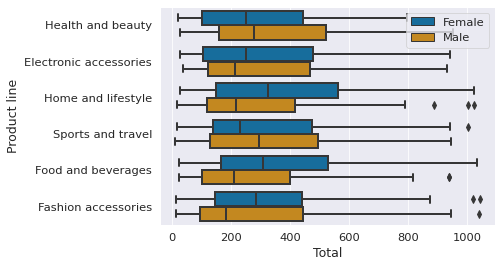

In [184]:
fig, axs = plt.subplots(1, 1)

sns.boxplot(y='Product line', x='Total', hue='Gender', data=sales, orient='h')
plt.legend(loc=1)


plt.savefig('../outputs/figures/boxgender.png')

In [23]:
pd.crosstab(sales['Customer type'], sales['Product line'], sales['Total'], aggfunc=np.mean)

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Customer type,,,,,,
Member,314.083269,306.092581,333.591702,353.849856,337.084663,324.532190
Normal,324.337353,304.151446,309.840300,295.730373,336.154364,340.361089


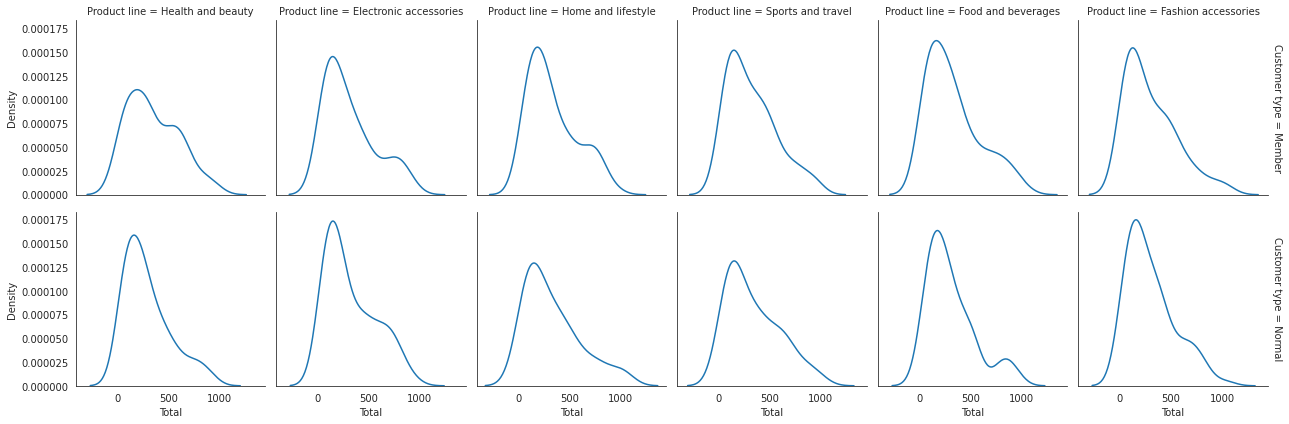

In [24]:
sns.displot(
    sales, x='Total', col='Product line', row='Customer type', height=3, 
    facet_kws=dict(margin_titles=True), kind="kde")

In [25]:
pd.crosstab(sales['Customer type'], sales['Product line'], normalize='index')

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Customer type,,,,,,
Member,0.155689,0.171657,0.187625,0.145709,0.165669,0.173653
Normal,0.184369,0.184369,0.160321,0.158317,0.154309,0.158317


In [26]:
pd.crosstab(sales['Payment'], sales['Product line'], sales['Total'], aggfunc=np.mean)

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Payment,,,,,,
Cash,291.971577,309.013895,337.032868,350.798143,364.490206,319.895136
Credit card,335.391685,309.554812,331.724434,319.389420,310.734900,336.155717
Ewallet,343.010038,297.800515,298.192500,302.550170,332.653781,341.347417


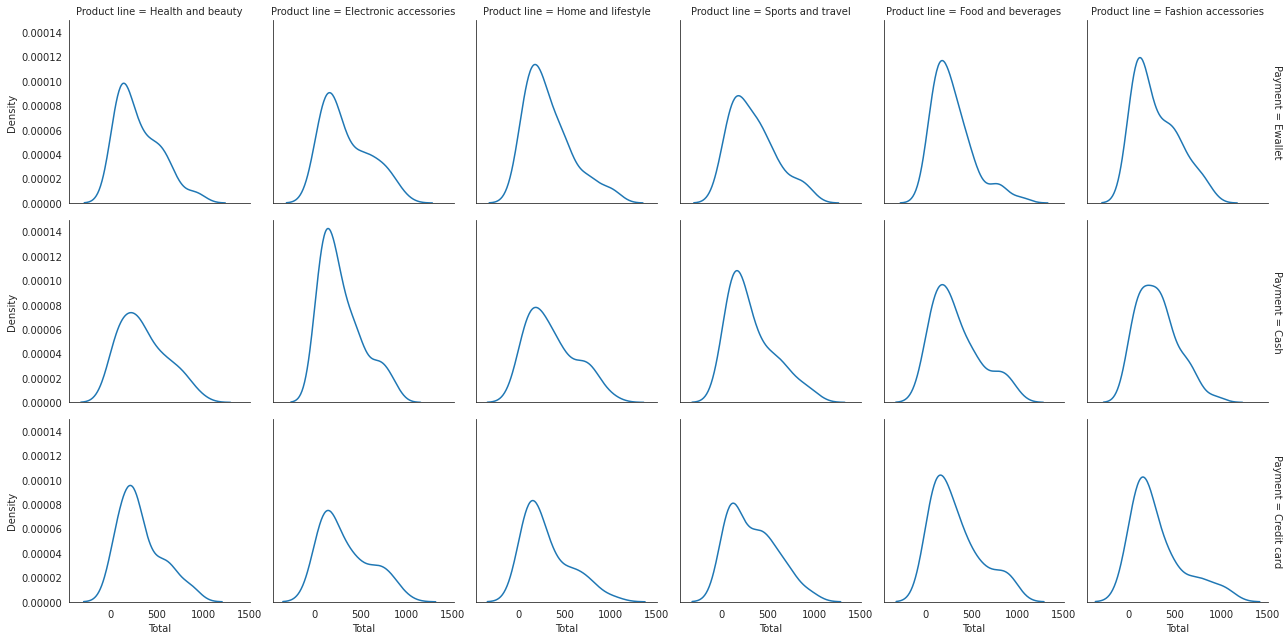

In [27]:
sns.displot(
    sales, x='Total', col='Product line', row='Payment', height=3, 
    facet_kws=dict(margin_titles=True), kind="kde")

### 3.4. Seasonality analysis

In [248]:
sales.groupby(['Branch', sales.index.weekday]).agg([np.sum, np.mean, np.std, 'count', 'median'])[['Total', 'Rating']]

Total                                          Rating  \
                         sum        mean         std count     median    sum   
Branch Date_Time                                                               
A      0          14239.0605  296.647094  174.703344    48  235.03200  340.7   
       1          14955.2130  293.239471  259.997112    51  175.91700  360.0   
       2          13267.7265  308.551779  222.616254    43  244.23000  297.4   
       3          15422.2740  335.266826  271.306734    46  247.66350  320.1   
       4          14543.8650  290.877300  226.529393    50  231.66675  365.6   
       5          16765.4130  335.308260  224.464929    50  296.39925  337.3   
       6          17006.8185  327.054202  237.733249    52  274.11300  368.1   
B      0          12734.7045  326.530885  255.664318    39  242.67600  286.1   
       1          18859.2390  355.834698  259.388330    53  280.03500  371.1   
       2          12707.5935  254.151870  169.842263    50  198.87000  322.6   
       3          15778.6230  358.605068  244.483153    44  314.07600  297.1   
       4          14417.7600  282.701176  246.446842    51  195.17400  341.4   
       5          21284.4240  354.740400  272.754984    60  287.56350  404.2   
       6          10415.3280  297.580800  213.589036    35  247.59000  241.1   
C      0          10925.3130  287.508237  234.705652    38  238.75950  267.4   
       1          17667.7935  327.181361  259.831762    54  211.74300  375.4   
       2          17755.8150  355.116300  311.510625    50  224.51100  353.2   
       3          14148.3510  294.757313  214.525046    48  215.72250  333.6   
       4          14964.7155  393.808303  302.611158    38  289.82100  276.6   
       5          18070.9725  334.647639  260.194511    54  302.77800  390.4   
       6          17035.7460  370.342304  247.695066    46  340.63575  323.3   

                                                   
                      mean       std count median  
Branch Date_Time                                   
A      0          7.097917  1.538650    48   7.20  
       1          7.058824  1.592505    51   7.00  
       2          6.916279  1.748732    43   6.60  
       3          6.958696  1.794631    46   6.85  
       4          7.312000  1.712218    50   7.50  
       5          6.746000  1.734313    50   6.50  
       6          7.078846  2.002482    52   7.10  
B      0          7.335897  1.872444    39   7.60  
       1          7.001887  1.705589    53   7.30  
       2          6.452000  1.624587    50   6.05  
       3          6.752273  1.624162    44   6.65  
       4          6.694118  1.669540    51   6.60  
       5          6.736667  1.785057    60   6.45  
       6          6.888571  1.688851    35   7.10  
C      0          7.036842  1.839127    38   6.95  
       1          6.951852  1.862311    54   7.05  
       2          7.064000  1.480866    50   6.90  
       3          6.950000  1.633297    48   6.75  
       4          7.278947  1.749928    38   7.30  
       5          7.229630  1.629287    54   7.35  
       6          7.028261  1.823752    46   6.95

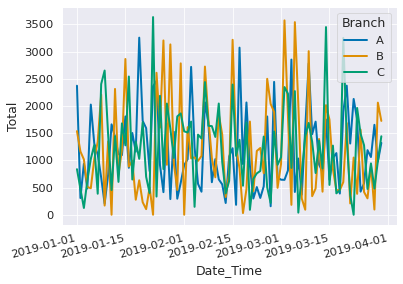

In [265]:
fig, ax = plt.subplots(1, 1)
ax = sns.lineplot(data=sales.groupby(['Branch']).resample('D').sum().reset_index(),
             x='Date_Time', y='Total', hue='Branch')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=15, horizontalalignment='right')

plt.savefig('../outputs/figures/season.png')

In [314]:
sales.resample('D')[['Rating']].describe()

Rating                                                   
            count      mean       std  min    25%   50%    75%   max
Date_Time                                                           
2019-01-01   12.0  6.583333  1.421800  4.3  5.525  6.80  7.175   9.0
2019-01-02    8.0  6.050000  0.930438  5.1  5.475  5.65  6.775   7.6
2019-01-03    8.0  8.112500  1.694898  5.5  6.875  8.50  9.625   9.8
2019-01-04    6.0  6.516667  2.121713  4.1  4.825  6.55  7.600   9.7
2019-01-05   12.0  7.433333  2.057507  4.2  5.825  7.70  9.125   9.8
...           ...       ...       ...  ...    ...   ...    ...   ...
2019-03-26   13.0  6.623077  1.909255  4.1  4.900  7.60  8.000   9.6
2019-03-27   10.0  6.760000  1.775888  4.3  5.850  6.40  7.300  10.0
2019-03-28   10.0  7.050000  2.255980  4.2  5.100  6.95  9.175   9.9
2019-03-29    8.0  6.925000  1.919635  4.3  5.550  6.70  8.375   9.8
2019-03-30   11.0  6.800000  1.772005  4.0  5.750  6.70  7.450   9.6

[89 rows x 8 columns]

In [31]:
sales.groupby([sales.index.hour]).agg([np.sum, np.mean, np.std])

Unit price                       Quantity                      \
                 sum       mean        std      sum      mean       std   
Date_Time                                                                 
10           5820.38  57.627525  27.072949      525  5.198020  2.887974   
11           5112.64  56.807111  28.481438      513  5.700000  3.124567   
12           4475.95  50.291573  26.758626      501  5.629213  3.039071   
13           5599.27  54.361845  24.988633      585  5.679612  2.694270   
14           4765.65  57.417470  27.221477      495  5.963855  3.030116   
15           5481.48  53.740000  24.770272      530  5.196078  3.034584   
16           4646.75  60.347403  25.826175      420  5.454545  2.980398   
17           4204.53  56.817973  26.176349      415  5.608108  2.894575   
18           4823.38  51.864301  28.575389      475  5.107527  2.708531   
19           6607.21  58.470885  25.502857      649  5.743363  2.896361   
20           4134.89  55.131867  25.924690      402  5.360000  2.916125   

                Total                         Rating                      \
                  sum        mean         std    sum      mean       std   
Date_Time                                                                  
10         31421.4810  311.103772  244.392253  716.9  7.098020  1.648453   
11         30377.3295  337.525883  259.957900  612.6  6.806667  1.779900   
12         26065.8825  292.875084  232.757307  649.7  7.300000  1.623758   
13         34723.2270  337.118709  260.056127  724.1  7.030097  1.663968   
14         30828.3990  371.426494  270.861916  575.6  6.934940  1.687431   
15         31179.5085  305.681456  244.391283  701.4  6.876471  1.705331   
16         25226.3235  327.614591  226.309199  528.2  6.859740  1.827801   
17         24445.2180  330.340784  246.224099  513.5  6.939189  1.765407   
18         26030.3400  279.896129  223.847145  668.4  7.187097  1.677940   
19         39699.5130  351.323124  242.415655  759.0  6.716814  1.766499   
20         22969.5270  306.260360  247.641933  523.3  6.977333  1.791615   

            Total_log                      
                  sum      mean       std  
Date_Time                                  
10         543.692419  5.383093  0.923691  
11         489.823864  5.442487  0.972248  
12         472.803550  5.312399  0.939578  
13         566.086336  5.495984  0.874320  
14         459.408121  5.535038  1.021571  
15         541.000224  5.303924  1.040152  
16         425.273293  5.523030  0.797633  
17         405.813222  5.483962  0.869191  
18         489.910438  5.267854  0.944780  
19         627.253744  5.550918  0.877774  
20         403.551072  5.380681  0.883510

In [273]:
sales['hour'] = sales.index.hour
sales['wday'] = sales.index.day_name()

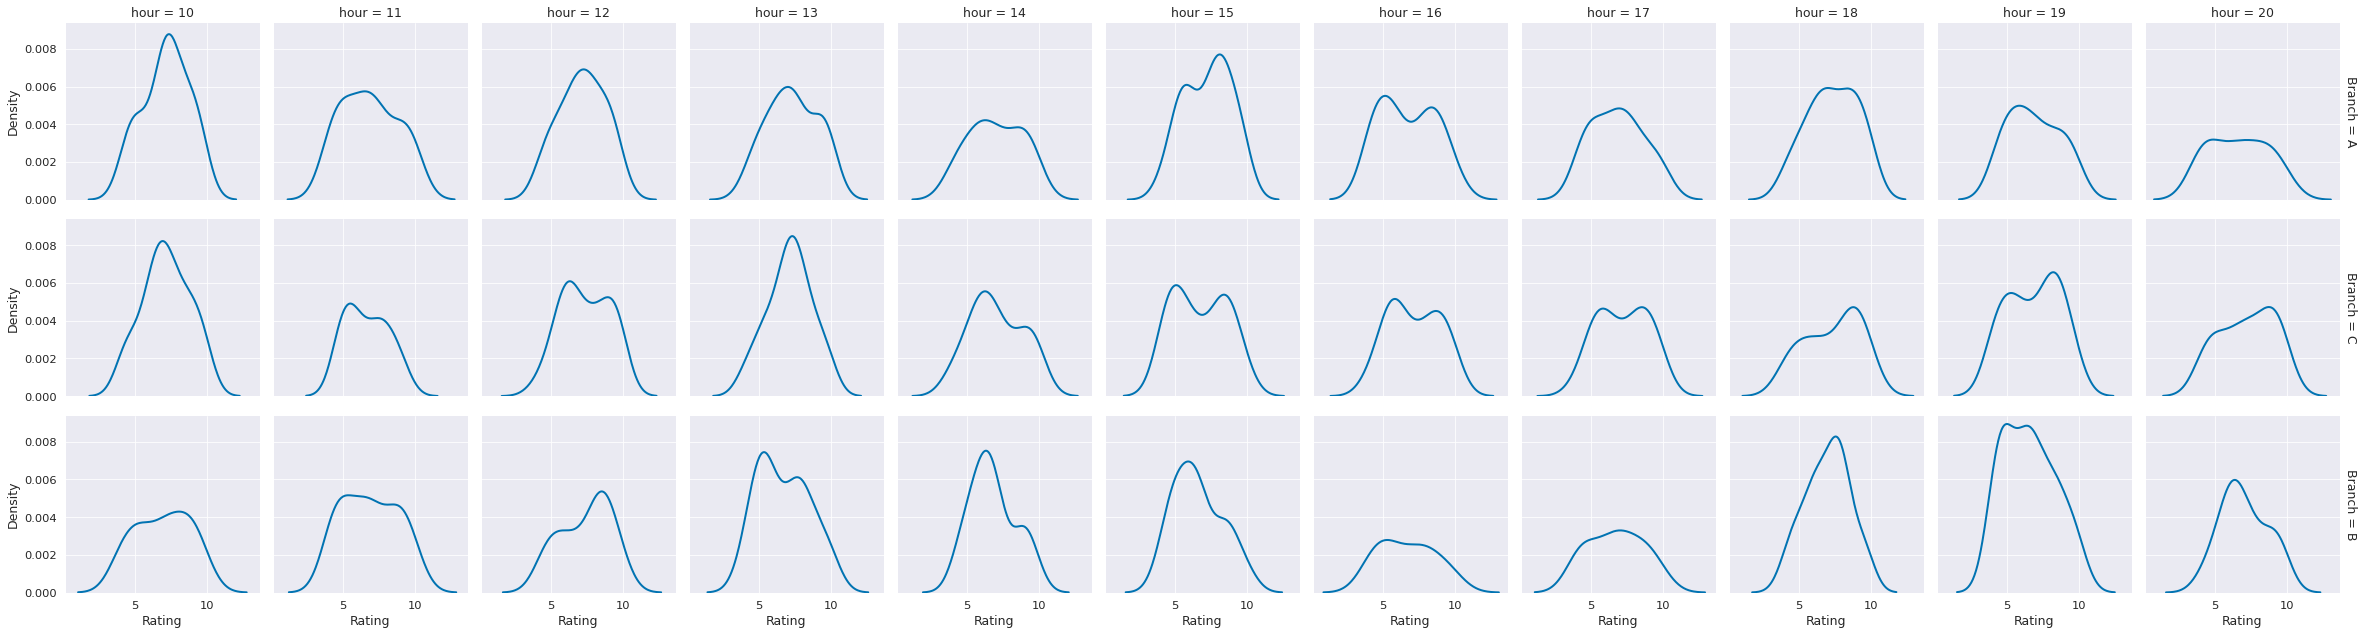

In [369]:
#sales.plot(kind='scatter', x='hour', y='Rating')
sns.displot(
    sales, x='Rating', col='hour', row='Branch', height=3, 
    facet_kws=dict(margin_titles=True), kind="kde")

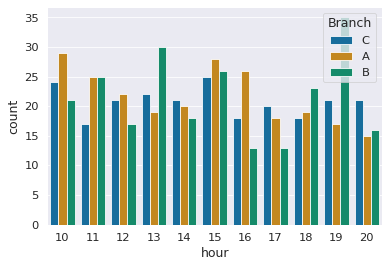

In [302]:
sns.countplot(x='hour', data=sales.loc[~sales['wday'].isin(['Saturday', 'Sunday'])], hue='Branch')
plt.savefig('../outputs/figures/hour.png')

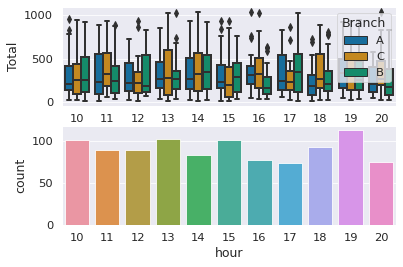

In [270]:
fig, axs = plt.subplots(2, 1)

sns.boxplot(x='hour', y='Total', data=sales, ax=axs[0], hue='Branch')
sns.countplot(x='hour', data=sales, ax=axs[1])

plt.savefig('../outputs/figures/hour.png')

<AxesSubplot:xlabel='Total', ylabel='wday'>

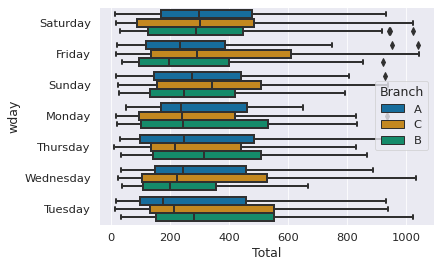

In [259]:
sns.boxplot(y='wday', x='Total', data=sales, hue='Branch', orient='h')

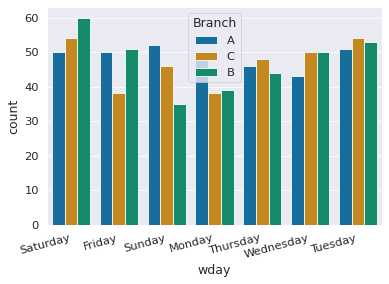

In [266]:
ax = sns.countplot(x='wday', data=sales, hue='Branch')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=15, horizontalalignment='right')
plt.savefig('../outputs/figures/week.png')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

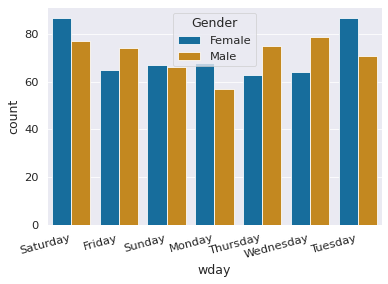

In [267]:
ax = sns.countplot(x='wday', data=sales, hue='Gender')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=15, horizontalalignment='right')

## 5. Significance test for promising hypothesis

<AxesSubplot:xlabel='Total', ylabel='Count'>

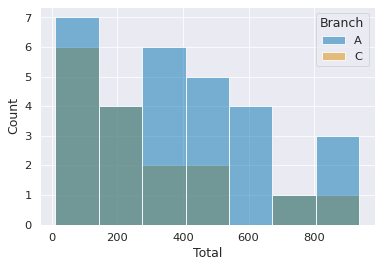

In [311]:
male_c = sales.loc[(sales['Gender'] == 'Male') & 
                (sales['Product line'] == 'Sports and travel') &
                (sales['Branch'] == 'C'), ['Total']]
male_a = sales.loc[(sales['Gender'] == 'Male') & 
                (sales['Product line'] == 'Sports and travel') &
                (sales['Branch'] == 'A'), ['Total']]



sns.histplot(data=sales.loc[(sales['Product line'] == 'Sports and travel') &
                                 (sales['Branch'].isin(['A', 'C'])) &
                           (sales['Gender'] == 'Male')], x='Total', hue='Branch')

In [397]:
wday19 = sales.loc[~sales['wday'].isin(['Saturday', 'Sunday'])].groupby(['Branch'])\
.resample('H')[['Total']].sum().reset_index()

In [398]:
wday19.set_index(['Date_Time'], inplace=True)

In [399]:
wB = wday19[(wday19.index.hour.isin([13, 19])) & (~wday19['Branch'].isin(['A', 'C']))]
wAC = wday19[(wday19.index.hour.isin([13, 19])) & (wday19['Branch'].isin(['A', 'C']))]

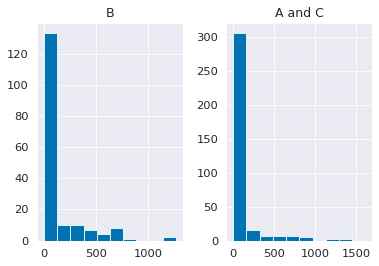

In [407]:
fig, ax = plt.subplots(1, 2)

wB.hist(ax=ax[0])
wAC.hist(ax=ax[1])

ax[0].set_title('B')
ax[1].set_title('A and C')
plt.savefig('../outputs/figures/test.png')

In [408]:
mannwhitneyu(wB['Total'], wAC['Total'])

MannwhitneyuResult(statistic=28009.0, pvalue=0.009697859930261333)